<a href="https://colab.research.google.com/github/muyuuuu/open-mmlab-colab/blob/main/MMCls_interferer_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# torch 版本检查

In [1]:
import torch, torchvision

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

1.8.1+cu101
True


# 安装 MMVC MMCls

In [3]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html


In [4]:
!git clone git@github.com:open-mmlab/mmclassification.git

fatal: destination path 'mmclassification' already exists and is not an empty directory.


In [5]:
!pwd

/content


In [6]:
%cd mmclassification/

/content/mmclassification


In [8]:
!pip install -v -e .

Created temporary directory: /tmp/pip-ephem-wheel-cache-n8pb11zm
Created temporary directory: /tmp/pip-req-tracker-c0g0zdq7
Created requirements tracker '/tmp/pip-req-tracker-c0g0zdq7'
Created temporary directory: /tmp/pip-install-gobkxh2h
Obtaining file:///content/mmclassification
  Added file:///content/mmclassification to build tracker '/tmp/pip-req-tracker-c0g0zdq7'
    Running setup.py (path:/content/mmclassification/setup.py) egg_info for package from file:///content/mmclassification
    Running command python setup.py egg_info
    running egg_info
    writing mmcls.egg-info/PKG-INFO
    writing dependency_links to mmcls.egg-info/dependency_links.txt
    writing requirements to mmcls.egg-info/requires.txt
    writing top-level names to mmcls.egg-info/top_level.txt
    adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
    reading manifest file 'mmcls.egg-info/SOURCES.txt'
    reading manifest template 'MANIFEST.in'
    writing manifest file 'mmcls.egg-info/SOURCES.txt'

In [9]:
import mmcls

In [10]:
!pwd

/content/mmclassification


# 查看图片

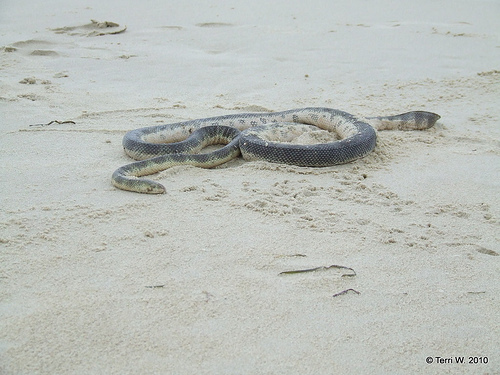

In [11]:
from PIL import Image
Image.open('demo/demo.JPEG')

In [32]:
!mkdir checkpoints

mkdir: cannot create directory ‘checkpoints’: File exists


# 加载模型

In [34]:
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -O checkpoints/model.pth

--2021-05-15 09:20:57--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14206911 (14M) [application/octet-stream]
Saving to: ‘checkpoints/model.pth’

checkpoints/model.p 100%[===================>]  13.55M  12.0MB/s    in 1.1s    

2021-05-15 09:20:59 (12.0 MB/s) - ‘checkpoints/model.pth’ saved [14206911/14206911]



In [13]:
import os
os.path.exists('checkpoints/model.pth')

True

# 推理

In [14]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

config_file = 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/model.pth'
device = 'cuda:0'

model = init_model(config_file, checkpoint_file, device)

Use load_from_local loader


/content/mmclassification/mmcls/apis/inference.py:44: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [16]:
img = 'demo/demo.JPEG'
# 自己执行适当的转换
result = inference_model(model, img)

In [17]:
result

{'pred_class': 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
 'pred_label': 34,
 'pred_score': 0.6252725720405579}

/content/mmclassification/mmcls/models/classifiers/base.py:227: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


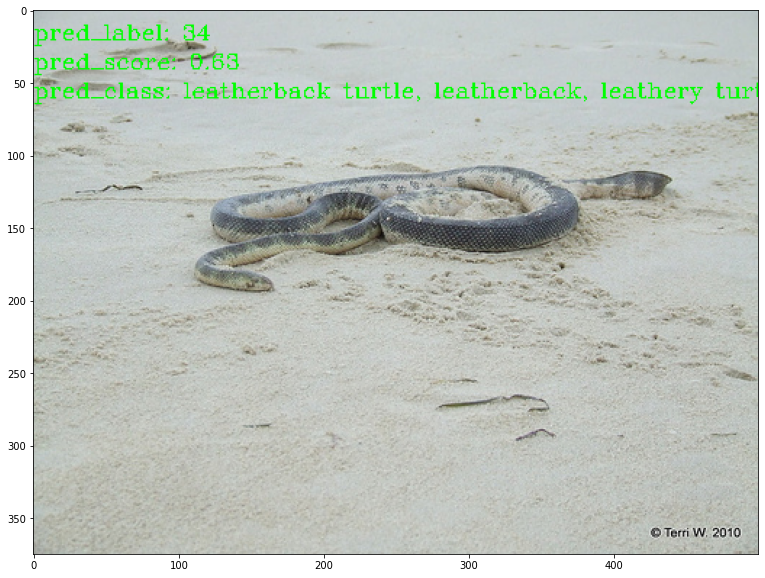

In [18]:
show_result_pyplot(model, img, result)